#  STACKOVERFLOW CHALLENGE

**TASKS:**

- How many developers participated in this survey?
- Find the top 10 countries participating devs are from.
- How many are from Nigeria?
- What's the average age the Nigerian dev wrote their first code?
- What's the average age of the Nigerian dev?
- What are the kinds of employment they are in?
- What's the gender distribution?
- What majors did they study in school?
- What languages have they worked with?
- What's the average number of languages they have worked with?
- What's the average number of years of experience of the Nigerian developer?

**KICKER**
1. How many devs are women, age below 25 and earn a living from dev?
2. What are the 10 most popular languages among Naija devs?

PS: Minus gender, ignore missing values in columns in view.

In [103]:
import pandas as pd 
import numpy as np
from statistics import mean
import math
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
warnings.filterwarnings("ignore")

In [104]:
#load in the data
df = pd.read_csv(r"C:\Users\Admin\Desktop\DA\developer_survey_2020\survey_results_public.csv")

In [105]:
df.shape 

(64461, 61)

In [106]:
#pd.set_option('display.max_rows', 65000)
pd.set_option('display.max_columns', 61)

In [107]:
#display 5 random samples from the dataset
df.sample(5)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
44607,45518,I am a developer by profession,Yes,NaN,NaN,Weekly,NaN,NaN,Antigua and Barbuda,Argentine peso,ARS,Microsoft SQL Server,NaN,NaN,I never completed any formal education,Employed full-time,NaN,"Woman;Man;Non-binary, genderqueer, or gender n...",NaN,NaN,I am actively looking for a job,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bisexual;Gay or Lesbian;Straight / Heterosexua...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12835,12875,I am a developer by profession,Yes,32.0,14,Yearly,62000.0,80141.0,United Kingdom,Pound sterling,GBP,DynamoDB;MongoDB;PostgreSQL;Redis,DynamoDB;MongoDB;PostgreSQL;Redis,"Database administrator;Developer, back-end;Dev...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,White or of European descent,Man,Flex time or a flexible schedule;Remote work o...,Slightly satisfied,"I’m not actively looking, but I am open to new...",C#;Dart;HTML/CSS;JavaScript;Rust;SQL;TypeScript,C#;Dart;HTML/CSS;JavaScript;SQL;TypeScript,.NET Core;Flutter;Node.js,.NET Core;Flutter;Node.js,Slack,Jira;Github;Slack;Trello,No,Extremely important,Not at all important/not necessary,Curious about other opportunities;Better compe...,"Read company media, such as employee blogs or ...",Once a year,Yes,Yes,Yes,Rarely: 1-2 days per year or less,Start a free trial;Visit developer communities...,"Hello, old friend",Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow,Windows,10 to 19 employees,Android;AWS;iOS,Android;AWS;iOS,I have a great deal of influence,Straight / Heterosexual,Yes,"No, not really",Less than once per month or monthly,Daily or almost daily,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular;Vue.js,Angular;Angular.js;Vue.js,Just as welcome now as I felt last year,37.0,12,10
11111,11146,I am a developer by profession,Yes,22.0,16,Monthly,2600.0,31200.0,Israel,United States dollar,USD,Firebase,Firebase;MySQL;SQLite,"Developer, full-stack;Developer, mobile","Secondary school (e.g. American high school, G...",Employed full-time,NaN,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am actively looking for a job,Bash/Shell/PowerShell;C;C#;C++;Dart;Java,Bash/Shell/PowerShell;C;C#;C++;Dart;HTML/CSS;J...,Flutter;Unity 3D,.NET;.NET Core;Flutter;Node.js;Unity 3D,"Jira;Github;Gitlab;Trello;Google Suite (Docs, ...",Jira;Github;Gitlab;Microsoft Teams;Microsoft A...,Yes,Extremely important,Fairly important,Better compensation,"Read company media, such as employee blogs or ...",Every few months,No,No,Yes,Sometimes: 1-2 days per month but less than we...,NaN,"Hello, old friend",Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Watch help / tutorial videos,Linux-based,100 to 499 employees,Android;Arduino;Google Cloud Platform;Linux;Ra...,Android;Arduino;AWS;Google Cloud Platform;Linu...,I have little or no influence,Straight / Heterosexual,Yes,"Yes, definitely",A few times per month or weekly,Daily or almost daily,Easy,Appropriate in length,No,NaN,NaN,Angular;Angular.js;ASP.NET;ASP.NET Core;jQuery...,A lot more welcome now than last year,50.0,6,1
30287,30404,I am 

In [108]:
#basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [109]:
#check for missing values
df_missing = df.isnull().sum()
df_missing

Respondent                          0
MainBranch                        299
Hobbyist                           45
Age                             19015
Age1stCode                       6561
CompFreq                        24392
CompTotal                       29635
ConvertedComp                   29705
Country                           389
CurrencyDesc                    18989
CurrencySymbol                  18989
DatabaseDesireNextYear          20391
DatabaseWorkedWith              14924
DevType                         15091
EdLevel                          7030
Employment                        607
Ethnicity                       18513
Gender                          13904
JobFactors                      15112
JobSat                          19267
JobSeek                         12734
LanguageDesireNextYear          10348
LanguageWorkedWith               7083
MiscTechDesireNextYear          22082
MiscTechWorkedWith              24147
NEWCollabToolsDesireNextYear    17174
NEWCollabToo

In [110]:
print("Total rows: ", df.shape[0])
print("Total columns: ", df.shape[1])

Total rows:  64461
Total columns:  61


### How many developers participated in this survey?

In [112]:
print('Total developers: ', len(df['Respondent']))

Total developers:  64461


### Find the top 10 countries participating devs are from.

In [113]:
df['Country'].value_counts().nlargest(10).to_frame()

,Country
United States,12469
India,8403
United Kingdom,3896
Germany,3890
Canada,2191
France,1898
Brazil,1818
Netherlands,1343
Poland,1278
Australia,1208


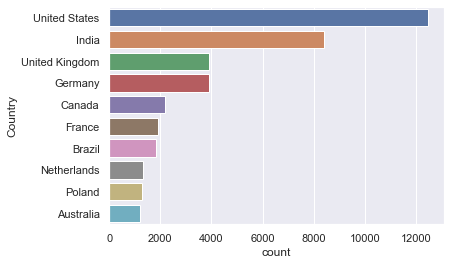

In [114]:
sns.countplot(y="Country", data=df, order = df['Country'].value_counts().nlargest(10).index)

### How many are from Nigeria?

In [115]:
df_developer_nig = df[df['Country'] == 'Nigeria']

print('Total number of developers from Nigeria: ', len(df_developer_nig))

Total number of developers from Nigeria:  593


### What's the average age the Nigerian dev wrote their first code?

In [116]:
# we have some NaN values which needs to be dealth with

df_developer_nig_code = df_developer_nig['Age1stCode'].dropna()
df_developer_nig_code = df_developer_nig_code.astype(str).astype(int)
print("The average age the Nigerian dev wrote their first code:", math.floor(df_developer_nig_code.mean()))

The average age the Nigerian dev wrote their first code: 19


### What's the average age of the Nigerian dev?

In [117]:
#**** round the age

print('The average age of the Nigerian Dev is:', math.floor(df_developer_nig['Age'].mean()))

The average age of the Nigerian Dev is: 25


### What are the kinds of employment they are in?

In [118]:
df_developer_nig['Employment'].value_counts().to_frame()

,Employment
Employed full-time,187
Student,135
"Not employed, but looking for work",118
"Independent contractor, freelancer, or self-employed",109
Employed part-time,36
"Not employed, and not looking for work",4


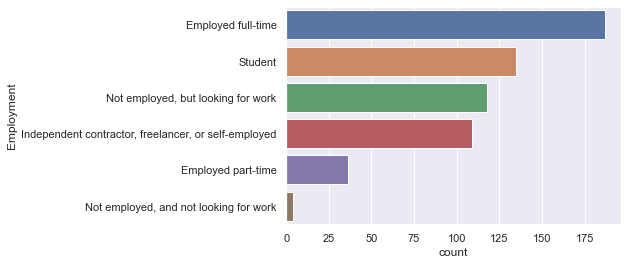

In [119]:
sns.countplot(y="Employment", data=df_developer_nig, order = df_developer_nig['Employment'].value_counts().index)

### What's the gender distribution?

In [120]:
df_developer_nig['Gender'].fillna('Man', inplace = True)

In [121]:
df_developer_nig['Gender'].value_counts()

Man                                                  559
Woman                                                 31
Woman;Man                                              2
Non-binary, genderqueer, or gender non-conforming      1
Name: Gender, dtype: int64

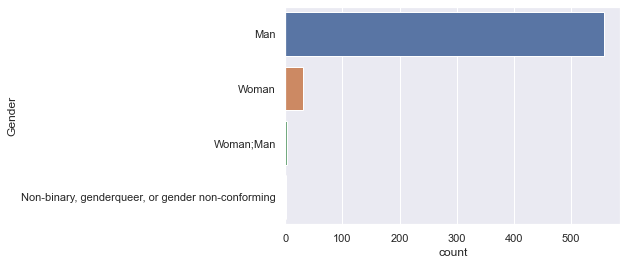

In [122]:
sns.countplot(y="Gender", data=df_developer_nig, order = df_developer_nig['Gender'].value_counts().index)

### What majors did they study in school?

In [123]:
df_developer_nig['UndergradMajor'].value_counts().to_frame() 

,UndergradMajor
"Computer science, computer engineering, or software engineering",192
"Another engineering discipline (such as civil, electrical, mechanical, etc.)",62
"A natural science (such as biology, chemistry, physics, etc.)",32
Mathematics or statistics,24
"Information systems, information technology, or system administration",23
"A business discipline (such as accounting, finance, marketing, etc.)",18
"A health science (such as nursing, pharmacy, radiology, etc.)",10
"A humanities discipline (such as literature, history, philosophy, etc.)",9
"A social science (such as anthropology, psychology, political science, etc.)",9
Web development or web design,8


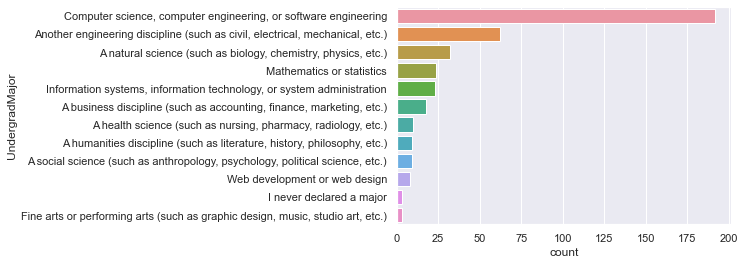

In [124]:
sns.countplot(y="UndergradMajor", data=df_developer_nig, order = df_developer_nig['UndergradMajor'].value_counts().index)

### What languages have they worked with?

In [125]:
df_developer_nig_lang = df_developer_nig['LanguageWorkedWith']
data = df_developer_nig_lang.str.split(";", expand=True)

In [126]:
df1 = data[0]
df2 = data[1]
df3 = data[2] 
df4 = data[3]
df5 = data[4]
df6 = data[5]
df7 = data[6]
df8 = data[7]
df9 = data[8]
df10 = data[9]
df11 = data[10]
df12 = data[11]
df13 = data[12]
df14 = data[13]
df15 = data[14]
df16 = data[15] 
df17 = data[16]

data = df1.append([df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17])

In [127]:
data.value_counts().to_frame()

,0
HTML/CSS,395
JavaScript,366
SQL,242
PHP,218
Python,192
Java,174
C#,100
TypeScript,86
C++,74
C,52


## KICKER

### How many devs are women, age below 25 and earn a living from dev?

In [131]:
print("Total number of women devs age below 25 and earning a living from dev: ", 
      len(df.loc[(df["Gender"] == 'Woman') & (df["Age"] <= 25) & (df['CompTotal'] >= 1.0)]))

Total number of women devs age below 25 and earning a living from dev:  496


### What are the 10 most popular languages among Naija devs?

In [129]:
data.value_counts().nlargest(10).to_frame()

,0
HTML/CSS,395
JavaScript,366
SQL,242
PHP,218
Python,192
Java,174
C#,100
TypeScript,86
C++,74
C,52
